In [1]:
# Visualising covid deaths from https://ourworldindata.org/covid-deaths using matplot library in jupyter notebook.

# importing libraries and file to be analysed
import numpy as np #numerical python
import pandas as pd # data manipulation,cleaning and analysis
import matplotlib.pyplot as plt #data visualization
from sklearn.impute import SimpleImputer # to handle missing values
covid=pd.read_csv("/home/samuel/Downloads/analysis_files/owid-covid-data.csv")

In [2]:
# view data

print(covid.shape) #order (row,col)
print(covid) 
print(covid.head(10))
print(covid.describe())

(211595, 67)
       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   
...         ...       ...          ...         ...          ...        ...   
211590      ZWE    Africa     Zimbabwe  2022-08-22     256628.0        4.0   
211591      ZWE    Africa     Zimbabwe  2022-08-23     256628.0        0.0   
211592      ZWE    Africa     Zimbabwe  2022-08-24     256628.0        0.0   
211593      ZWE    Africa     Zimbabwe  2022-08-25     256675.0       47.0   
211594      ZWE    Africa     Zimbabwe  2022-08-26     256682.0        7.0   

        new_cases_smoothed  total_deaths  new_deat

        total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  2.030510e+05  2.028070e+05        2.016300e+05  1.842720e+05   
mean   3.981466e+06  1.262208e+04        1.264255e+04  7.068821e+04   
std    2.497046e+07  8.710411e+04        8.511552e+04  3.653450e+05   
min    1.000000e+00  0.000000e+00        0.000000e+00  1.000000e+00   
25%    3.674500e+03  0.000000e+00        6.714000e+00  1.060000e+02   
50%    4.366200e+04  6.300000e+01        1.004290e+02  1.070000e+03   
75%    4.684245e+05  1.007000e+03        1.159000e+03  9.243000e+03   
max    6.000142e+08  4.081689e+06        3.436124e+06  6.483909e+06   

          new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  184232.000000        183059.000000            202119.000000   
mean      146.122623           146.833251             52678.845843   
std       753.911245           739.300132             95532.934164   
min         0.000000             0.000000                 0.001000   
25%       

In [3]:
# Drop column
# Syntax: df.drop('column_name', axis=1,inplace=True) [inplace--so no new dataframe needs to be created]

covid.drop(['new_cases_smoothed'],axis=1,inplace=True)
# Dropping multiple column
covid.drop(['new_deaths_smoothed','new_cases_per_million','total_cases_per_million'],axis=1,inplace=True)
print(covid.shape)

(211595, 63)


In [4]:
# renaming columns
covid.rename(columns={'date': 'Date','location':'Country','continent': 'Continent','iso_code':'ISO_code'},inplace=True)
print(covid)

       ISO_code Continent      Country        Date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   
...         ...       ...          ...         ...          ...        ...   
211590      ZWE    Africa     Zimbabwe  2022-08-22     256628.0        4.0   
211591      ZWE    Africa     Zimbabwe  2022-08-23     256628.0        0.0   
211592      ZWE    Africa     Zimbabwe  2022-08-24     256628.0        0.0   
211593      ZWE    Africa     Zimbabwe  2022-08-25     256675.0       47.0   
211594      ZWE    Africa     Zimbabwe  2022-08-26     256682.0        7.0   

        total_deaths  new_deaths  new_cases_smoothed_per_millio

In [5]:
# Continents
print(list(covid.Continent.unique()))

['Asia', nan, 'Europe', 'Africa', 'North America', 'South America', 'Oceania']


In [6]:
imputer = SimpleImputer(strategy='constant') #simple imputer
covid2 = pd.DataFrame(imputer.fit_transform(covid),columns=covid.columns) #replacing a missing value with a constant value

In [7]:
# grouping by date and country
covid3 = covid2.groupby(['Date','Country'])[['total_cases','total_deaths','total_vaccinations']].sum().reset_index()
print(covid3)

              Date            Country    total_cases   total_deaths  \
0       2020-01-01          Argentina  missing_value  missing_value   
1       2020-01-01             Mexico  missing_value  missing_value   
2       2020-01-02          Argentina  missing_value  missing_value   
3       2020-01-02             Mexico  missing_value  missing_value   
4       2020-01-03          Argentina  missing_value  missing_value   
...            ...                ...            ...            ...   
211590  2022-08-26  Wallis and Futuna          761.0            7.0   
211591  2022-08-26              World    600014151.0      6483909.0   
211592  2022-08-26              Yemen        11922.0         2155.0   
211593  2022-08-26             Zambia       332710.0         4016.0   
211594  2022-08-26           Zimbabwe       256682.0         5593.0   

       total_vaccinations  
0           missing_value  
1           missing_value  
2           missing_value  
3           missing_value  
4      

In [8]:
# replacing 'missing_value' with 0
covid3['total_cases'].replace({'missing_value':0},inplace=True)
print(covid3['total_cases'])
covid3['total_deaths'].replace({'missing_value':0},inplace=True)
print(covid3['total_deaths'])
covid3['total_vaccinations'].replace({'missing_value':0},inplace=True)
print(covid3['total_vaccinations'])

0                 0.0
1                 0.0
2                 0.0
3                 0.0
4                 0.0
             ...     
211590          761.0
211591    600014151.0
211592        11922.0
211593       332710.0
211594       256682.0
Name: total_cases, Length: 211595, dtype: float64
0               0.0
1               0.0
2               0.0
3               0.0
4               0.0
            ...    
211590          7.0
211591    6483909.0
211592       2155.0
211593       4016.0
211594       5593.0
Name: total_deaths, Length: 211595, dtype: float64
0         0.000000e+00
1         0.000000e+00
2         0.000000e+00
3         0.000000e+00
4         0.000000e+00
              ...     
211590    0.000000e+00
211591    1.255171e+10
211592    0.000000e+00
211593    0.000000e+00
211594    0.000000e+00
Name: total_vaccinations, Length: 211595, dtype: float64


In [9]:
# Countries whose death_count>1000000
covid4=covid3[covid3['total_deaths']>1000000]
countries=covid4['Country'].unique()
print(len(countries))
print(countries)

10
['World' 'High income' 'Upper middle income' 'Europe' 'South America'
 'Asia' 'Lower middle income' 'North America' 'European Union'
 'United States']


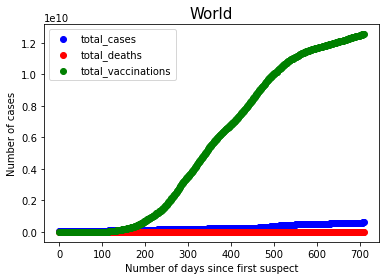

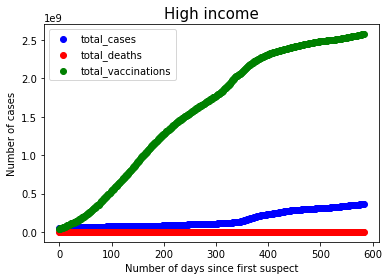

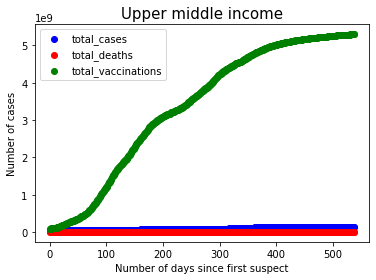

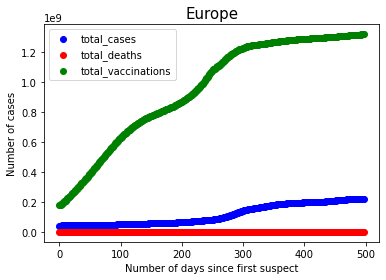

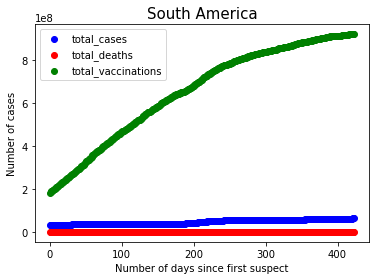

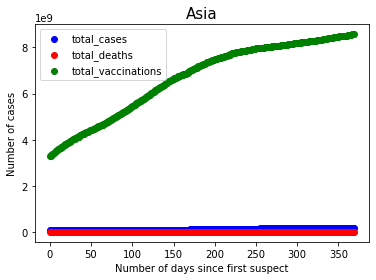

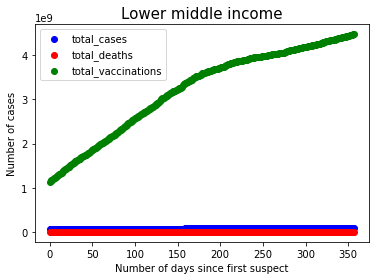

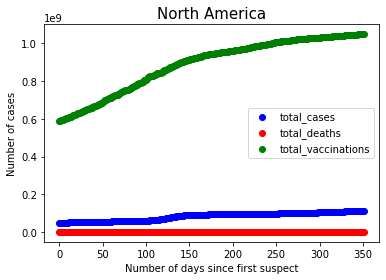

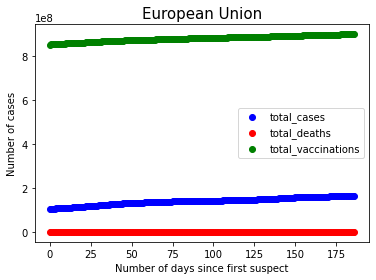

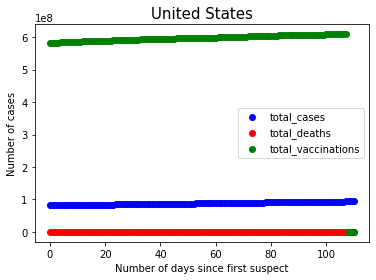

In [10]:
# scatter plot showing trend of total_cases, total_deaths, total_vaccinations of these 10 countries
for idx in range (0,len(countries)):
    c=covid4[covid4['Country']==countries[idx]].reset_index()
    plt.scatter(np.arange(0,len(c)),c['total_cases'],color='blue',label="total_cases")
    plt.scatter(np.arange(0,len(c)),c['total_deaths'],color='red',label="total_deaths")
    plt.scatter(np.arange(0,len(c)),c['total_vaccinations'],color='green',label="total_vaccinations")
    plt.title(countries[idx],size=15)
    plt.xlabel("Number of days since first suspect")
    plt.ylabel("Number of cases")
    plt.legend()
    plt.show()

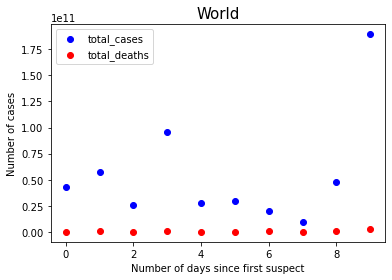

In [11]:
# grouping all countries
covid5=covid4.groupby(['Country'])[['total_cases','total_deaths']].sum().reset_index()
c=covid5
plt.scatter(np.arange(0,len(c)),c['total_cases'],color='blue',label="total_cases")
plt.scatter(np.arange(0,len(c)),c['total_deaths'],color='red',label="total_deaths")
plt.title("World",size=15)
plt.xlabel("Number of days since first suspect")
plt.ylabel("Number of cases")
plt.legend()
plt.show()

In [12]:
# analysis by date, total_deaths > 1000000
date=covid4['Date'].unique()
print(len(date))

710


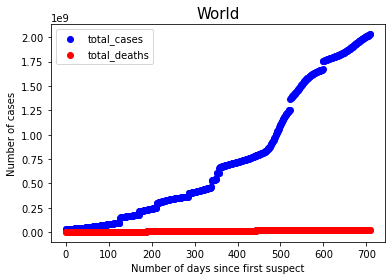

In [13]:
covid6=covid4.groupby(["Date"])[['total_cases','total_deaths']].sum().reset_index()
c=covid6
plt.scatter(np.arange(0,len(c)),c['total_cases'],color='blue',label="total_cases")
plt.scatter(np.arange(0,len(c)),c['total_deaths'],color='red',label="total_deaths")
plt.title("World",size=15)
plt.xlabel("Number of days since first suspect")
plt.ylabel("Number of cases")
plt.legend()
plt.show()